In [1]:
import pandas as pd
from datetime import datetime
import re

# copertura nel tempo - grafico 1

In [2]:
df = pd.read_csv('totale_isr_palestine.csv')

In [3]:
df[df['titolo'].str.contains('Israel|Palestin',flags=re.I).fillna(False)]

,titolo,link,data,giornale
0,"Israele, Hamas annuncia: "" Lanciati 150 razzi ...",https://video.repubblica.it/mondo/israele-hama...,2023-10-07,Repubblica
1,Israele dopo 50 anni preso di nuovo di sorpres...,https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica
2,"Israele, i deltaplani d’assalto che hanno aper...",https://www.repubblica.it/esteri/2023/10/07/ne...,2023-10-07,Repubblica
3,"La propaganda delle brigate al Qassam, braccio...",https://video.repubblica.it/mondo/la-propagand...,2023-10-07,Repubblica
4,"Il dolore dei fedeli alla Sinagoga di Roma: ""I...",https://roma.repubblica.it/cronaca/2023/10/07/...,2023-10-07,Repubblica
...,...,...,...,...
18055,"Bombe sull’ospedale di Gaza, l'ambasciata isra...",https://video.corriere.it/esteri/bombe-sull-os...,2023-10-17,Corriere della sera
18067,Il video dei presunti prigionieri di Hamas sen...,https://video.corriere.it/esteri/video-presunt...,2023-12-09,Corriere della sera
18071,"Lior Raz, da Fauda al campo di battaglia: così...",https://video.corriere.it/oggi/lior-raz-fauda-...,2023-10-10,Corriere della sera
18072,Droni colpiscono le torri israeliane: così è i...,https://video.corriere.it/esteri/droni-colpisc...,2023-10-08,Corriere della sera


In [4]:
df['data'] =pd.to_datetime(df['data'])

In [5]:
df = df[df['data']<=datetime(2024, 2, 25)]

In [6]:
all_dfs = []
for label,sub_df in df.groupby('giornale'):
    df_filt = sub_df['data'].value_counts().rename(label)
    all_dfs.append(df_filt)

In [7]:
df_to_plot = pd.concat(all_dfs,axis=1).fillna(0)

In [8]:
df_to_plot = df_to_plot.rolling(window=3, center=True).mean()

In [9]:
mask = df_to_plot.index < datetime(2024, 2, 25)

In [10]:
df_to_plot = df_to_plot[mask]

In [11]:
df_to_plot

,Corriere della sera,Libero,Repubblica
data,,,
2023-10-07,NaN,NaN,NaN
2023-10-08,37.000000,101.000000,107.666667
2023-10-09,70.666667,119.333333,153.333333
2023-10-10,83.000000,136.000000,175.000000
2023-10-11,83.000000,136.333333,178.333333
...,...,...,...
2024-02-20,13.333333,20.000000,36.666667
2024-02-21,13.666667,20.000000,35.666667
2024-02-22,16.000000,18.000000,38.333333


<Axes: xlabel='data'>

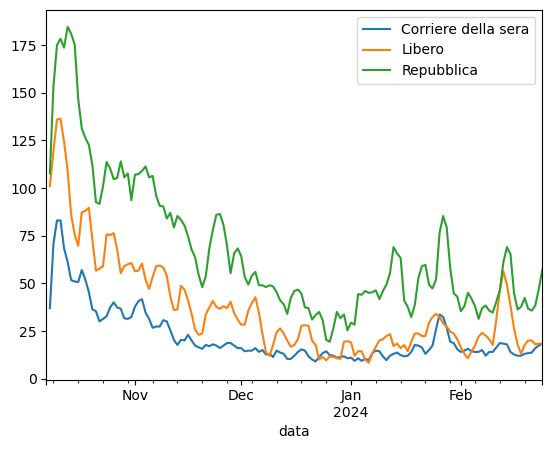

In [13]:
df_to_plot.plot()
#grafico 1

# parole contenute - grafico 2

In [14]:
isr = ["israele", "israeliano", "israeliani", "israeliana", "israeliane", "israelita", "israeliti", "israelitica", "israelitiche", "israelitico", "israelitici"]

In [15]:
pal = ["palestina", "palestinese", "palestinesi", "palestiniana","palestiniano", "palestinate", "palestino", "palestini", "palestine"]

In [16]:
import re

In [17]:
df_title_plot = pd.DataFrame(columns=['Isr e derivati', 'Pal e derivati','Hamas'])

In [18]:
df['giornale'].unique()

array(['Repubblica', 'Corriere della sera', 'Libero'], dtype=object)

In [19]:
df_title_plot = pd.DataFrame(columns=['giornale','Isr e derivati', 'Pal e derivati','Hamas'])

for giornale in ['Repubblica','Libero','Corriere della sera']:
    df_filt = df[df['giornale']==giornale]
    n_isr = len(df_filt[df_filt['titolo'].str.contains('|'.join(isr), flags=re.I).fillna(False)])
    n_pal = len(df_filt[df_filt['titolo'].str.contains('|'.join(pal), flags=re.I).fillna(False)])
    n_ham = len(df_filt[df_filt['titolo'].str.contains('hamas', flags=re.I).fillna(False)])
    df_temp = pd.DataFrame([[giornale, n_isr, n_pal, n_ham]], columns=['giornale','Isr e derivati', 'Pal e derivati','Hamas'])
    df_title_plot = pd.concat([df_title_plot,df_temp])

In [20]:
df_title_plot = df_title_plot.set_index('giornale')

In [21]:
df_title_plot_abs = df_title_plot.copy()

In [22]:
for i in range(len(df_title_plot)):
    df_title_plot.iloc[i] = df_title_plot.iloc[i]/df_title_plot.iloc[i].sum()*100

In [24]:
df_title_plot
#controllo dataset normalizzato

,Isr e derivati,Pal e derivati,Hamas
giornale,,,
Repubblica,49.670898,18.312177,32.016925
Libero,54.397923,15.481986,30.120091
Corriere della sera,50.732218,19.246862,30.020921


In [25]:
df_title_plot_abs

,Isr e derivati,Pal e derivati,Hamas
giornale,,,
Repubblica,2113,779,1362
Libero,1676,477,928
Corriere della sera,970,368,574


In [26]:
import matplotlib.pyplot as plt

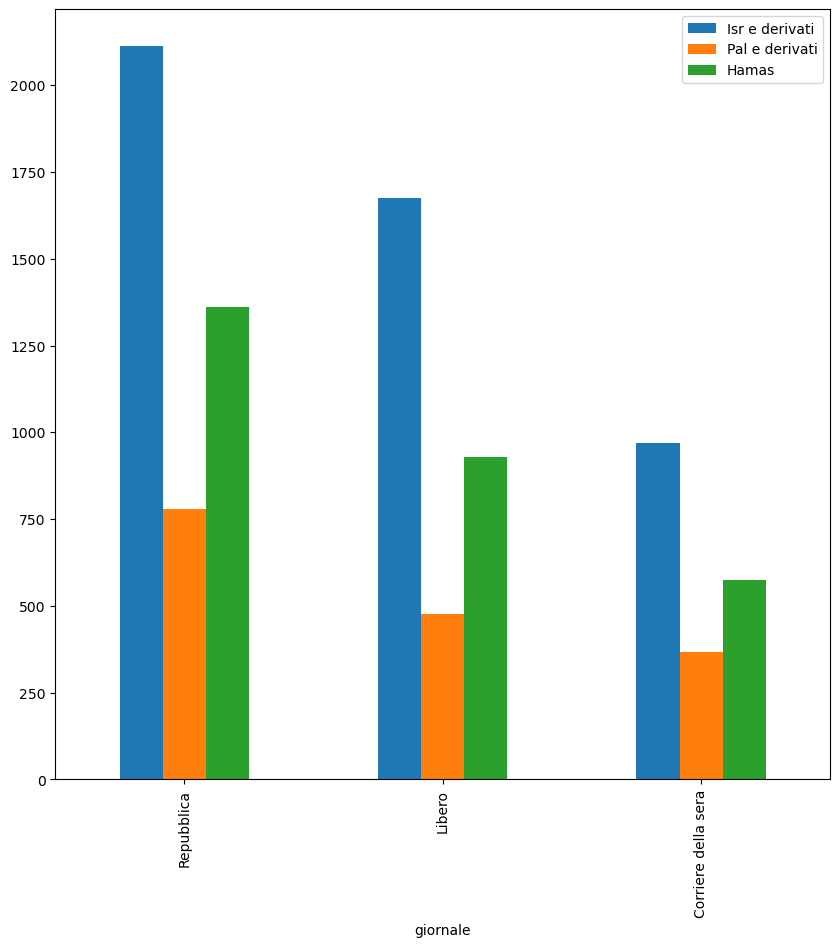

In [28]:
ax = df_title_plot_abs.plot(kind='bar',figsize=(10, 10))
plt.legend(loc='upper right')
plt.show()
#grafico 2

# antisemitismo e islamofobia - grafico 3

In [37]:
df_tot_confronto = pd.read_csv('df_tot_islamofobia_antisemitismo.csv')

In [38]:
df_tot_confronto['data'] = pd.to_datetime(df_tot_confronto['data']) 

In [39]:
df_tot_confronto.sample()

,titolo,link,data,giornale,parola
341,"""Non c'è, lo dico senza paura!"": Israele, espl...",https://www.liberoquotidiano.it/news/politica/...,2023-10-12,Libero,antisemitismo


In [40]:
df_tot_confronto.groupby('parola')['giornale'].value_counts()

parola         giornale           
antisemitismo  Repubblica             852
               Libero                 474
               Corriere della sera    391
islamofobia    Repubblica              34
               Libero                  32
               Corriere della sera     20
Name: count, dtype: int64

In [41]:
all_dfs = []
for label,sub_df in df_tot_confronto.groupby('parola'):
    df_filt = sub_df['data'].value_counts().rename(label)
    all_dfs.append(df_filt)

In [42]:
df_plot_confronto = pd.concat(all_dfs,axis=1).fillna(0)

In [43]:
df_plot_confronto_avg = df_plot_confronto.rolling(window=3, center=True).mean()

<Axes: xlabel='data'>

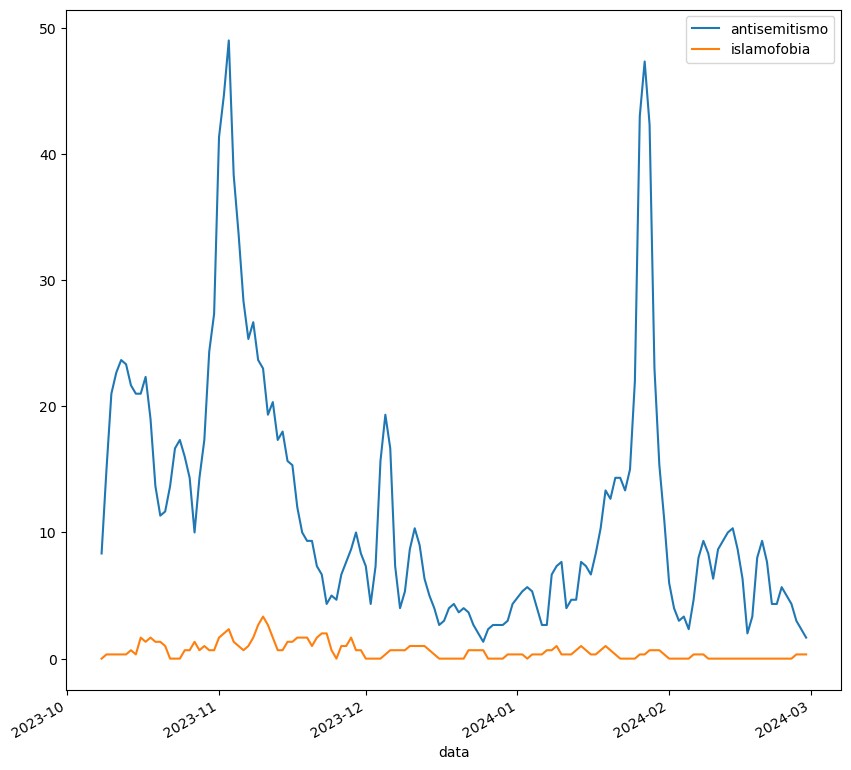

In [45]:
df_plot_confronto_avg.plot(figsize=(10,10))
#grafico 3